### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지 import
import statsmodels.api as sm # 안쓸껄??
import sklearn as sk

In [4]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 합성곱 신경망 이미지 분류

#### 패션 MNIST 데이터 로드

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data

(train_input, train_target), (test_input, test_target) = load_data()

In [6]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [9]:
print((train_scaled.shape, train_target.shape))
print((val_scaled.shape, val_target.shape))

((48000, 28, 28, 1), (48000,))
((12000, 28, 28, 1), (12000,))


In [11]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

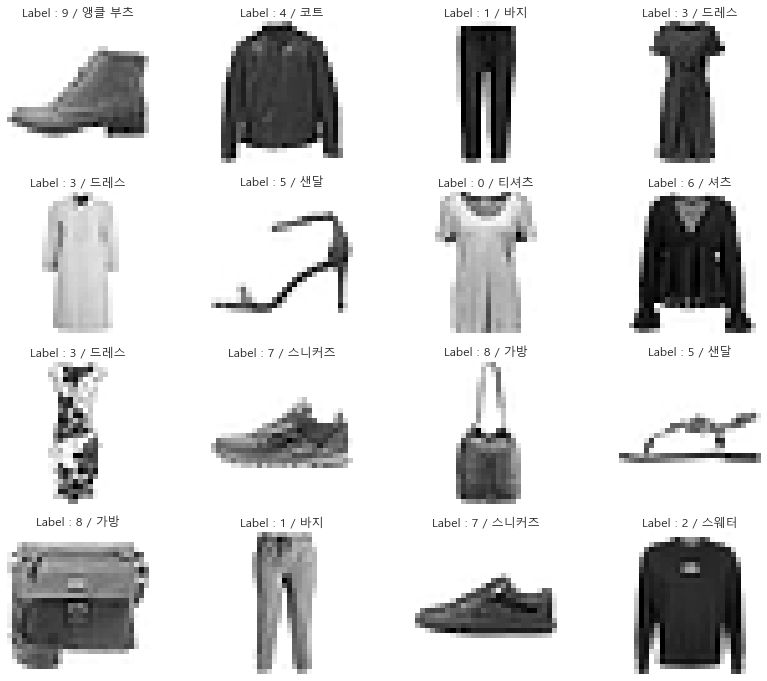

In [16]:
import random

samples = random.choices(population=range(0, len(train_target)), k=16)
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(train_scaled[n].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.title(f'Label : {train_target[n]} / {classes[train_target[n]]}')
    plt.axis('off')
    
plt.show()

#### CNN 신경망 생성

In [22]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 27s 17ms/step - loss: 0.5322 - accuracy: 0.8095 - val_loss: 0.3342 - val_accuracy: 0.8763
Epoch 2/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3511 - accuracy: 0.8753 - val_loss: 0.2701 - val_accuracy: 0.8992
Epoch 3/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3005 - accuracy: 0.8904 - val_loss: 0.2675 - val_accuracy: 0.8995
Epoch 4/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2680 - accuracy: 0.9018 - val_loss: 0.2432 - val_accuracy: 0.9109
Epoch 5/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2439 - accuracy: 0.9120 - val_loss: 0.2372 - val_accuracy: 0.9148
Epoch 6/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2271 - accuracy: 0.9150 - val_loss: 0.2268 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2085 - accuracy: 0.9241 - val_loss: 0.2156 -

#### 모델 읽어와서 바로 확인

In [25]:
model2 = keras.models.load_model('best-cnn-model.h5')
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2156 - accuracy: 0.9231


[0.21560987830162048, 0.9230833053588867]

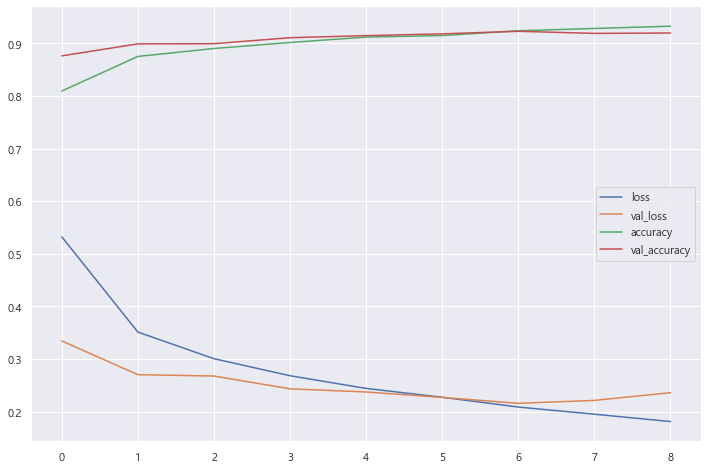

In [26]:
# Accuracy / Lossfunction 값
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(history.history[each], label = each)
plt.legend()
plt.show()

In [27]:
score = model.evaluate(train_scaled, train_target)
print('Test loss : ', score[0])
print('Test Accuracy : ', score[1])

1500/1500 [==============================] - 9s 6ms/step - loss: 0.1457 - accuracy: 0.9474
Test loss :  0.14571762084960938
Test Accuracy :  0.9473541378974915


In [28]:
predicted_result = model.predict(val_scaled)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10], val_target[:10]

375/375 [==============================] - 2s 6ms/step


(array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64),
 array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=uint8))

In [29]:
wrong_result = []

for n in range(0, len(val_target)):
    if predicted_labels[n] != val_target[n]:
        wrong_result.append(n)
len(wrong_result)

923

##### 기존 방식에서 오차개수 1459에서 923으로 준것 확인

In [30]:
samples = random.choices(population= wrong_result, k = 16)
samples

[9959,
 9194,
 2632,
 489,
 3745,
 3077,
 2474,
 11303,
 10406,
 3677,
 7716,
 4555,
 10884,
 5388,
 3001,
 2754]

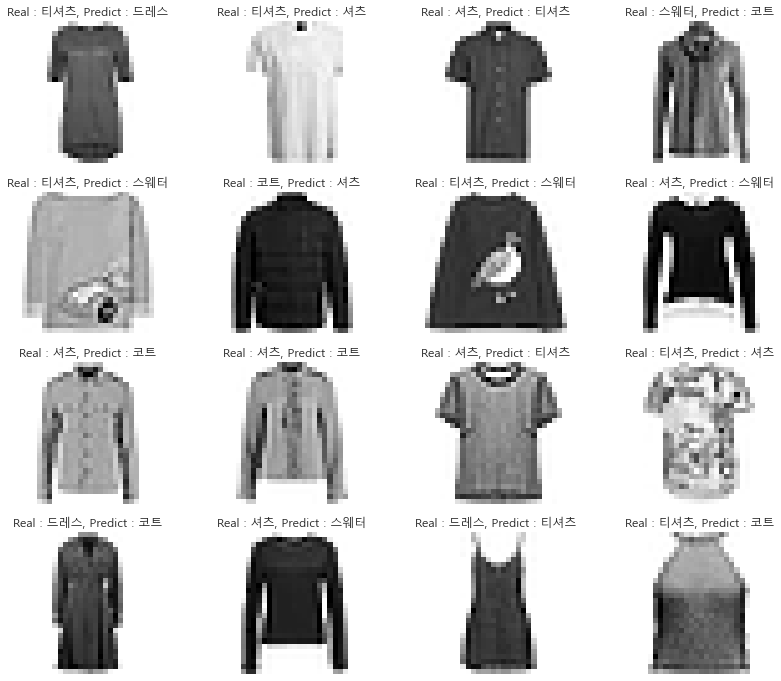

In [34]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(val_scaled[n].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    # plt.title(f'Real : {val_target[n]} / {classes[val_target[n]]}, Predict : {predicted_labels[n]} / {classes[predicted_labels[n]]}')
    plt.title(f'Real : {classes[val_target[n]]}, Predict : {classes[predicted_labels[n]]}')
    plt.axis('off')
    
plt.show()